In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load and combine datasets
train_data = pd.read_csv("Data/train.txt", sep=';')
val_data = pd.read_csv("Data/val.txt", sep=';')
test_data = pd.read_csv("Data/test.txt", sep=';')


In [3]:

train_data.columns = ["Text", "Emotions"]
val_data.columns = ["Text", "Emotions"]
test_data.columns = ["Text", "Emotions"]


In [4]:

# Combine train and validation datasets
all_data = pd.concat([train_data, val_data])


In [5]:

# Extract texts and labels
texts = all_data["Text"].tolist()
labels = all_data["Emotions"].tolist()


In [6]:

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)


In [7]:

# Label encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
one_hot_labels = tf.keras.utils.to_categorical(labels)


In [8]:

# Split combined dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)


In [9]:

# Prepare validation data (from val.txt)
val_texts = val_data["Text"].tolist()
val_labels = val_data["Emotions"].tolist()
val_sequences = tokenizer.texts_to_sequences(val_texts)
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_length)
val_labels_encoded = label_encoder.transform(val_labels)
val_one_hot_labels = tf.keras.utils.to_categorical(val_labels_encoded)


In [10]:

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])


In [11]:

# Train the model with validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(val_padded_sequences, val_one_hot_labels))


Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3977 - loss: 1.5169 - val_accuracy: 0.8174 - val_loss: 0.5817
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8804 - loss: 0.3873 - val_accuracy: 0.9555 - val_loss: 0.1621
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9859 - loss: 0.0612 - val_accuracy: 0.9650 - val_loss: 0.1391
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9942 - loss: 0.0289 - val_accuracy: 0.9680 - val_loss: 0.1176
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9962 - loss: 0.0164 - val_accuracy: 0.9710 - val_loss: 0.1270
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9970 - loss: 0.0152 - val_accuracy: 0.9685 - val_loss: 0.1428
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9973 - loss: 0.0124 - val_accuracy: 0.9705 - val_loss: 0.1394
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9971 - loss: 0.0127 - v

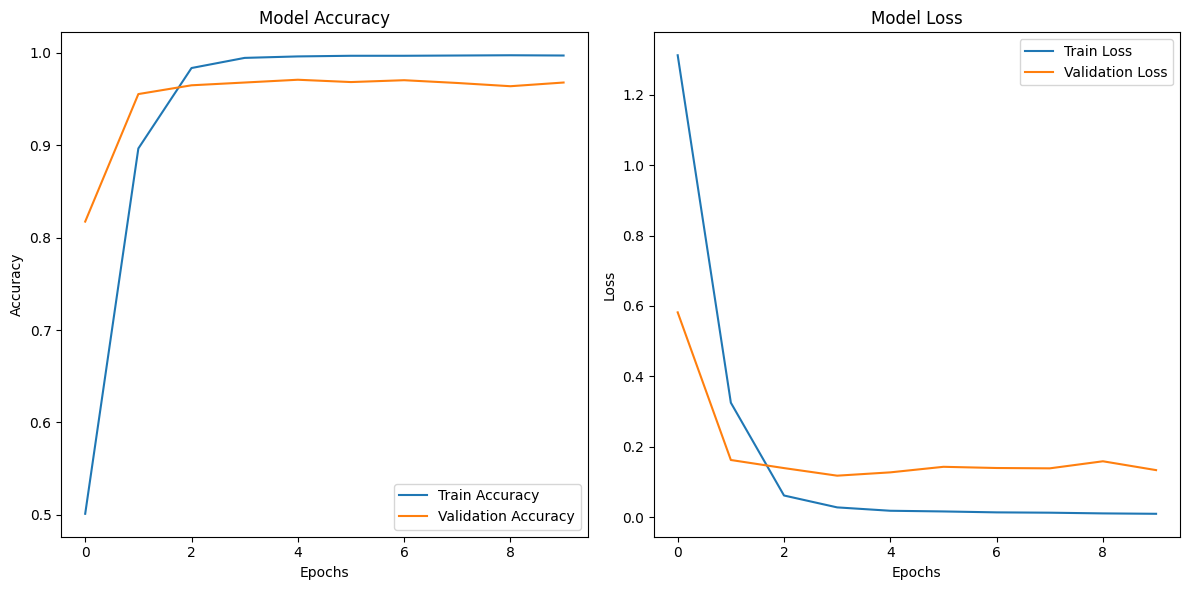

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Subplot for loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [13]:

# Evaluate the model on test data
test_texts = test_data["Text"].tolist()
test_labels = test_data["Emotions"].tolist()
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)
test_labels_encoded = label_encoder.transform(test_labels)
test_one_hot_labels = tf.keras.utils.to_categorical(test_labels_encoded)

test_loss, test_accuracy = model.evaluate(test_padded_sequences, test_one_hot_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.7191
Test Loss: 0.7082828283309937, Test Accuracy: 0.809904932975769


In [14]:
input_text = "i had lunch with an old friend and it was nice but in general im not feeling energetic"

input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = pad_sequences(input_sequence,maxlen=max_length)
prediction = model.predict(padded_input_sequence)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
print(predicted_label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
joy
